# **Prepare Dataset**

In [1]:
!pip install scipy==1.11.4
!pip install scikit-plot
!pip install dalex
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=a80b1faaf6258fae8e17b6ef05e820c01e0fdf84bed5c2e05870c77fed9f3ea6
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "bhavikjikadara/mental-health-dataset"

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.95M [00:00<?, ?B/s]
100% 1.95M/1.95M [00:00<00:00, 94.7MB/s]


In [3]:
import zipfile

dataset_zip = zipfile.ZipFile("/content/mental-health-dataset.zip", "r")
dataset_zip.extractall()
dataset_zip.close()

# **Read and Define Data to Variable**

In [4]:
import pandas as pd
raw_data = pd.read_csv("/content/Mental Health Dataset.csv")

# Local computing
# raw_data = pd.read_csv("../data/stress.csv")

In [5]:
raw_data.shape

(292364, 17)

In [6]:
raw_data.sample(frac = 1).head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
55175,8/27/2014 15:25,Male,United Kingdom,Corporate,No,No,No,Go out Every day,Maybe,Yes,Yes,Low,No,Maybe,No,No,No
34351,8/30/2014 19:56,Female,United Kingdom,Student,No,No,Yes,Go out Every day,Yes,Yes,Yes,Medium,Yes,No,Yes,No,Not sure
197444,8/28/2014 14:38,Male,United States,Housewife,No,Yes,Yes,15-30 days,No,No,No,Low,No,No,No,No,Yes
287712,8/27/2014 19:13,Male,Netherlands,Student,No,Yes,Yes,31-60 days,Maybe,Yes,Maybe,High,Yes,Yes,Maybe,Maybe,Not sure
39208,8/27/2014 11:43,Female,United States,Business,No,Yes,Yes,15-30 days,Maybe,Yes,Maybe,High,No,Maybe,Yes,No,Yes


# **Data Inspection**

In [7]:
# cek struktur data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [8]:
# cek apakah ada dataset yang hilang
raw_data.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


# **Preprocessing Dataset**

In [9]:
preprocessed_data = raw_data.dropna()
print("Total data (rows):", len(preprocessed_data), "\n")

preprocessed_data.isna().sum()

Total data (rows): 287162 



,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [10]:
# buang kolom waktu
preprocessed_data = preprocessed_data.drop(['Timestamp'], axis = 1)

# buang data duplikat
preprocessed_data = preprocessed_data.drop_duplicates()
preprocessed_data.shape

(92920, 16)

In [11]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
nama_kolom = preprocessed_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in nama_kolom:
    try:
      unique_values = preprocessed_data[i].unique()
      print("Nama kolom: {} ({}, {})".format(i, len(unique_values), preprocessed_data[i].dtype))
      print(unique_values)
    except:
      continue

Nama kolom: Gender (2, object)
['Female' 'Male']
Nama kolom: Country (35, object)
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
Nama kolom: Occupation (5, object)
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
Nama kolom: self_employed (2, object)
['No' 'Yes']
Nama kolom: family_history (2, object)
['Yes' 'No']
Nama kolom: treatment (2, object)
['Yes' 'No']
Nama kolom: Days_Indoors (5, object)
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
Nama kolom: Growing_Stress (3, object)
['Yes' 'No' 'Maybe']
Nama kolom: Changes_Habits (3, object)
['No' 'Yes' 'Maybe']
Nama kolom: Mental_Health_His

In [12]:
# Count the number of occurrences of each class

class_counts = preprocessed_data['Growing_Stress'].value_counts()
class_counts

,count
Growing_Stress,
Yes,31974
Maybe,31571
No,29375


# **Label Encoding**

In [13]:
print("Total classes/ labels:", len(preprocessed_data['Growing_Stress'].unique()), "\n")
preprocessed_data['Growing_Stress'].unique()

Total classes/ labels: 3 



array(['Yes', 'No', 'Maybe'], dtype=object)

In [14]:
# transform string to numeric label encode

from sklearn.preprocessing import LabelEncoder

label_mappings = {}   # init dictionary to store label encode

for col in preprocessed_data.columns:
    try:
        # encode string to numeric feature
        label_encoder = LabelEncoder()
        preprocessed_data.loc[:, col] = label_encoder.fit_transform(preprocessed_data[col])
        label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    except:
      continue

preprocessed_data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [15]:
# display encoded label n value

for col, mapping in label_mappings.items():
    print(f"\nMapping for column '{col}':")
    display(pd.DataFrame(list(mapping.items()), columns=['Original', 'Encoded']))


Mapping for column 'Gender':


,Original,Encoded
0,Female,0
1,Male,1



Mapping for column 'Country':


,Original,Encoded
0,Australia,0
1,Belgium,1
2,Bosnia and Herzegovina,2
3,Brazil,3
4,Canada,4
5,Colombia,5
6,Costa Rica,6
7,Croatia,7
8,Czech Republic,8
9,Denmark,9



Mapping for column 'Occupation':


,Original,Encoded
0,Business,0
1,Corporate,1
2,Housewife,2
3,Others,3
4,Student,4



Mapping for column 'self_employed':


,Original,Encoded
0,No,0
1,Yes,1



Mapping for column 'family_history':


,Original,Encoded
0,No,0
1,Yes,1



Mapping for column 'treatment':


,Original,Encoded
0,No,0
1,Yes,1



Mapping for column 'Days_Indoors':


,Original,Encoded
0,1-14 days,0
1,15-30 days,1
2,31-60 days,2
3,Go out Every day,3
4,More than 2 months,4



Mapping for column 'Growing_Stress':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'Changes_Habits':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'Mental_Health_History':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'Mood_Swings':


,Original,Encoded
0,High,0
1,Low,1
2,Medium,2



Mapping for column 'Coping_Struggles':


,Original,Encoded
0,No,0
1,Yes,1



Mapping for column 'Work_Interest':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'Social_Weakness':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'mental_health_interview':


,Original,Encoded
0,Maybe,0
1,No,1
2,Yes,2



Mapping for column 'care_options':


,Original,Encoded
0,No,0
1,Not sure,1
2,Yes,2


<Axes: >

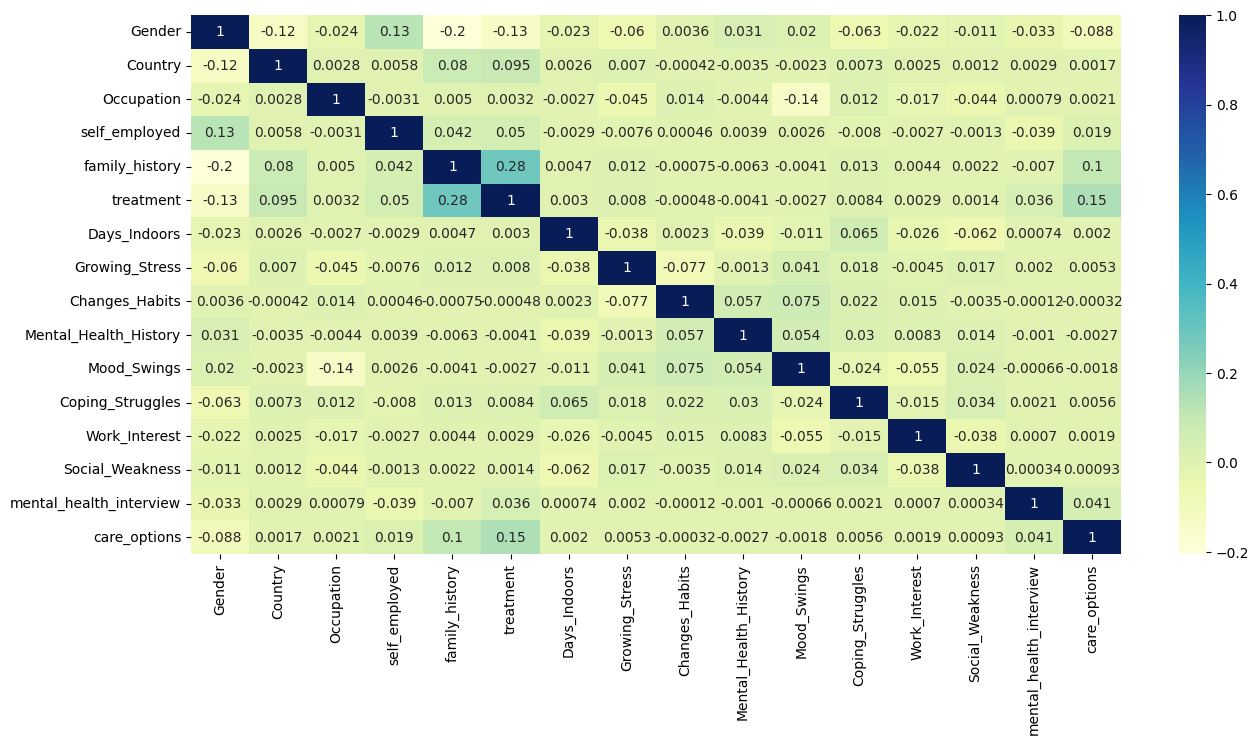

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(preprocessed_data.corr(method='pearson'), cmap="YlGnBu", annot=True)

In [17]:
# drop unrelated column
final_data = preprocessed_data.drop([
    'Country', 'Gender',   # pasti di drop
    'self_employed', 'mental_health_interview', 'care_options',
    'family_history',
], axis = 1)
final_data['Growing_Stress'] += 1

In [18]:
# cek kembali tipe data per kolom
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92920 entries, 3 to 292360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Occupation             92920 non-null  object
 1   treatment              92920 non-null  object
 2   Days_Indoors           92920 non-null  object
 3   Growing_Stress         92920 non-null  object
 4   Changes_Habits         92920 non-null  object
 5   Mental_Health_History  92920 non-null  object
 6   Mood_Swings            92920 non-null  object
 7   Coping_Struggles       92920 non-null  object
 8   Work_Interest          92920 non-null  object
 9   Social_Weakness        92920 non-null  object
dtypes: object(10)
memory usage: 9.8+ MB


# **Preprocessing Dataset & Train-Test Split**

In [19]:
# memisahkan variabel x dan y dari tabel
X_data = final_data.drop(['Growing_Stress'], axis = 1)
y_data = final_data['Growing_Stress'].astype(int)

In [20]:
# bagi data untuk training n testing dgn rasio 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size = 0.3,
    random_state = 1000
)

# **Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier

dectree_model = DecisionTreeClassifier(max_depth=10, random_state=1000)
dectree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1000)

In [63]:
dectree_result = dectree_model.predict(X_test)
dectree_proba = dectree_model.predict_proba(X_test)

## **Evaluasi Model**

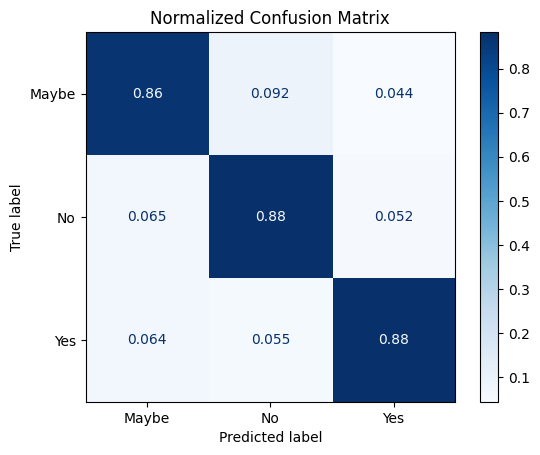

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, dectree_result, display_labels=["Maybe", "No", "Yes"], cmap="Blues", normalize="true")
plt.title("Normalized Confusion Matrix")
plt.show()

In [65]:
# Evaluasi model random forest
from sklearn import metrics

pd.DataFrame(metrics.classification_report(y_test, dectree_result, target_names = ["Maybe", "No", "Yes"], output_dict=True))

,Maybe,No,Yes,accuracy,macro avg,weighted avg
precision,0.873259,0.846843,0.907009,0.875951,0.875704,0.876637
recall,0.863819,0.883016,0.881379,0.875951,0.876071,0.875951
f1-score,0.868514,0.864551,0.894010,0.875951,0.875692,0.876102
support,9436.000000,8779.000000,9661.000000,0.875951,27876.000000,27876.000000


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

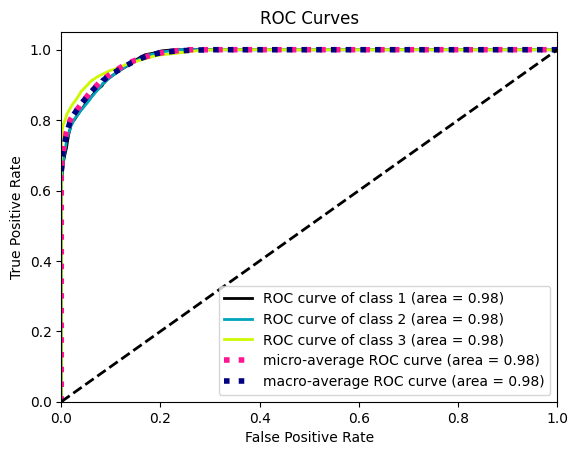

In [66]:
# untuk visualisasi ROC
import scikitplot as skplt

# Evaluasi model random forest
skplt.metrics.plot_roc(y_test, dectree_proba)

# **Random Forest**

In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

randfor_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=1000, verbose=1)
randfor_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   16.4s


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=1000,
                       verbose=1)

In [27]:
randfor_result = randfor_model.predict(X_test)
randfor_proba = randfor_model.predict_proba(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s


## **Evaluasi Model**

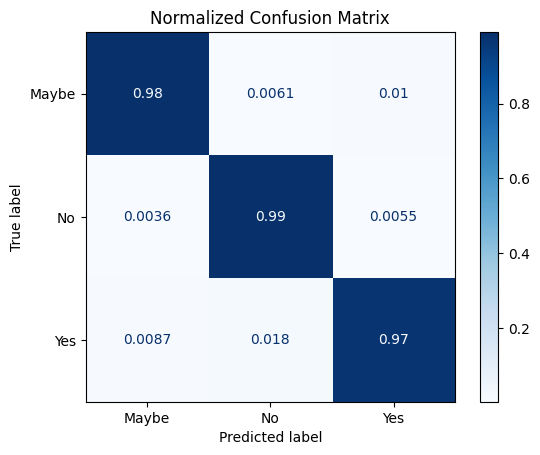

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, randfor_result, display_labels=["Maybe", "No", "Yes"], cmap="Blues", normalize="true")
plt.title("Normalized Confusion Matrix")
plt.show()

In [29]:
# Evaluasi model random forest
from sklearn import metrics

pd.DataFrame(metrics.classification_report(y_test, randfor_result, target_names = ["Maybe", "No", "Yes"], output_dict=True))

,Maybe,No,Yes,accuracy,macro avg,weighted avg
precision,0.987658,0.974350,0.985025,0.982494,0.982344,0.982554
recall,0.983786,0.990887,0.973605,0.982494,0.982759,0.982494
f1-score,0.985718,0.982549,0.979282,0.982494,0.982516,0.982489
support,9436.000000,8779.000000,9661.000000,0.982494,27876.000000,27876.000000


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

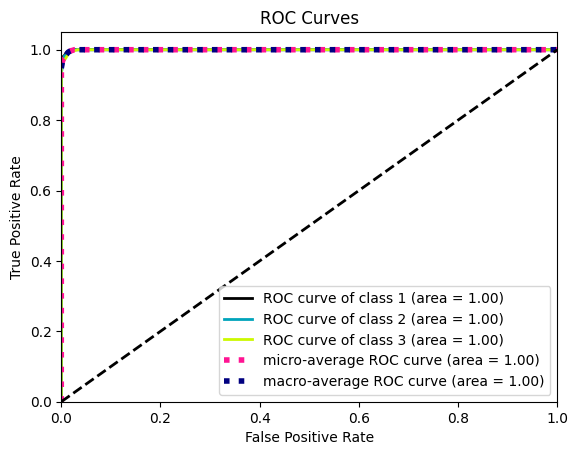

In [30]:
# untuk visualisasi ROC
import scikitplot as skplt

# Evaluasi model random forest
skplt.metrics.plot_roc(y_test, randfor_proba)

# **Hyperparameter Tuning**

## **Hyperparameter Tuning - Decision Tree**

In [31]:
# Mendefinisikan model decision tree
dectree_model = DecisionTreeClassifier()

# mendefinisikan parameter untuk tuning
param_grid = {
    'max_depth': [10, 15, 20, None],          # Maximum depth of the tree
    'random_state': [42, 1000],               # Seed for random number generator
}

In [32]:
from sklearn.model_selection import GridSearchCV

# definisikan objek GridSearchCV
grid_search = GridSearchCV(
    estimator=dectree_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
)

# fit model dengan data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, None],
                         'random_state': [42, 1000]},
             scoring='accuracy', verbose=1)

In [33]:
# ambil parameter dari model terbaik
best_params_dt = grid_search.best_params_

# ambil model terbaik dari hasil tuning
best_model_dt = grid_search.best_estimator_

# cek setting hyperparameter terbaik
print(f"Best Hyperparameters: {best_params_dt}")

Best Hyperparameters: {'max_depth': 20, 'random_state': 42}


In [34]:
# buat prediksi dari model terbaik
best_model_dt_result = best_model_dt.predict(X_test)
best_model_dt_proba = best_model_dt.predict_proba(X_test)

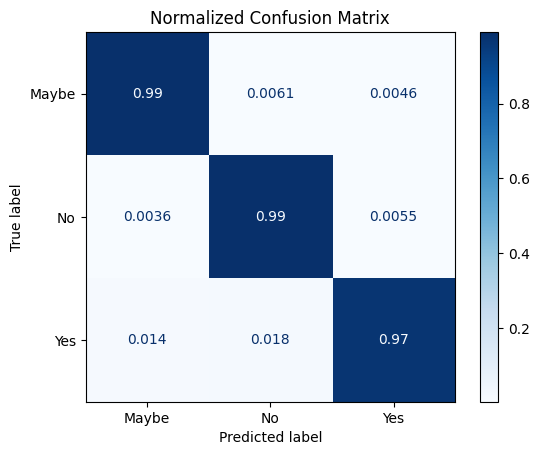

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model_dt_result, display_labels=["Maybe", "No", "Yes"], cmap="Blues", normalize="true")
plt.title("Normalized Confusion Matrix")
plt.show()

In [36]:
# Evaluasi model decision tree hasil hyperparameter tuning
pd.DataFrame(metrics.classification_report(y_test, best_model_dt_result, target_names = ["Maybe", "No", "Yes"], output_dict=True))

,Maybe,No,Yes,accuracy,macro avg,weighted avg
precision,0.982115,0.974350,0.990363,0.982422,0.982276,0.982528
recall,0.989296,0.990887,0.968016,0.982422,0.982733,0.982422
f1-score,0.985692,0.982549,0.979062,0.982422,0.982435,0.982405
support,9436.000000,8779.000000,9661.000000,0.982422,27876.000000,27876.000000


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

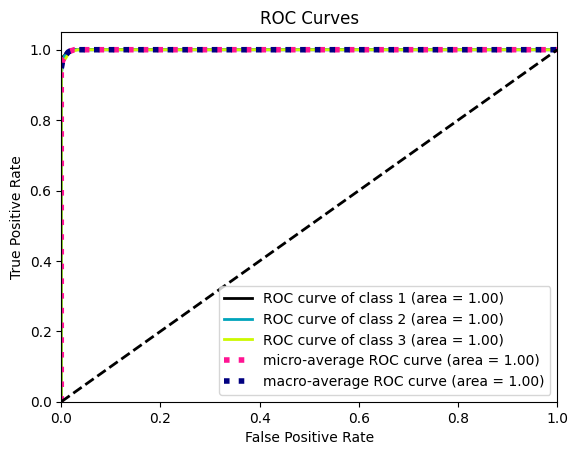

In [37]:
# Evaluasi model decision tree
skplt.metrics.plot_roc(y_test, best_model_dt_proba)

In [38]:
# Evaluasi model decision tree - R^2, MAE, MSE, RMSE, MAPE
import numpy as np

print("R^2  =", best_model_dt.score(X_test, y_test))
print("MAE  =", metrics.mean_absolute_error(y_test, best_model_dt_result))
print("MSE  =", metrics.mean_squared_error(y_test, best_model_dt_result))
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, best_model_dt_result)))
print("MAPE =", metrics.mean_absolute_percentage_error(y_test, best_model_dt_result) * 100, "%")

R^2  = 0.9824221552590041
MAE  = 0.024070885349404506
MSE  = 0.03705696656622184
RMSE = 0.19250186120196822
MAPE = 1.1945759793370643 %


# **Percobaan Prediksi**

In [47]:
testing = X_test.sample(frac=1).head(1)

predicted_result = best_model_dt.predict(testing)
predicted_proba = best_model_dt.predict_proba(testing)

for col, mapping in label_mappings.items():
    try:
        testing[col] = list(mapping)[int(testing[col].iloc[0])]
    except:
        print("skipped", col)
        continue
display(pd.DataFrame(testing).T)

# find the key of label where value = predicted_result[0] & get max value of proba
list(label_mappings['Growing_Stress'])[int(predicted_result[0]) - 1], predicted_proba.max()

skipped Gender
skipped Country
skipped self_employed
skipped family_history
skipped Growing_Stress
skipped mental_health_interview
skipped care_options


,211924
Occupation,Corporate
treatment,No
Days_Indoors,More than 2 months
Changes_Habits,Maybe
Mental_Health_History,Maybe
Mood_Swings,Medium
Coping_Struggles,No
Work_Interest,No
Social_Weakness,No


('Yes', 1.0)

## **Save/ Export Model**

In [48]:
import joblib

filename = "my_model.joblib"

# save model
joblib.dump(best_model_dt, filename)

['my_model.joblib']

In [49]:
import json
import numpy as np

# Define a custom encoder to handle NumPy int64
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        return super(NpEncoder, self).default(obj)

# save configuration file using the custom encoder
with open('config.json', 'w') as f:
    json.dump(label_mappings, f, cls=NpEncoder)

In [50]:
# load model
loaded_model = joblib.load(filename)

In [51]:
testing = X_test.sample(frac=1).head(1)

predicted2_result = loaded_model.predict(testing)
predicted2_proba = loaded_model.predict_proba(testing)

for col, mapping in label_mappings.items():
    try:
        testing[col] = list(mapping)[int(testing[col].iloc[0])]
    except:
        print("skipped", col)
        continue
display(pd.DataFrame(testing).T)

# find the key of label where value = predicted2_result[0] & get max value of proba
list(label_mappings['Growing_Stress'])[int(predicted2_result[0]) - 1], predicted2_proba.max()

skipped Gender
skipped Country
skipped self_employed
skipped family_history
skipped Growing_Stress
skipped mental_health_interview
skipped care_options


,144183
Occupation,Student
treatment,No
Days_Indoors,More than 2 months
Changes_Habits,No
Mental_Health_History,No
Mood_Swings,Low
Coping_Struggles,Yes
Work_Interest,Yes
Social_Weakness,No


('No', 1.0)

# **Interpretasi Model**

In [ ]:
# membuat objek explainer dari model

import dalex as dx

explainer = dx.Explainer(best_model_dt, X_test, y_test.astype(int), label="Decision Tree")

Preparation of a new explainer is initiated

  -> data              : 27876 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 27876 values
  -> model_class       : sklearn.tree._classes.DecisionTreeClassifier (default)
  -> label             : Decision Tree
  -> predict function  : <function yhat_proba_default at 0x7d77cc4f4940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.315, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = 0.136, mean = 1.69, max = 3.0
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# Feature Importance
importance = explainer.model_parts()
importance.plot()